## Visualization of Sweden data engineer/ analyst jobs

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import csv

# Input and output file paths
input_file = "final_output.txt"
output_file = "final_output.csv"

# Open the input text file and output CSV file
with open(input_file, "r") as infile, open(output_file, "w", newline="") as outfile:
    writer = csv.writer(outfile)
    # Write the header row with column names "word" and "frequency"
    writer.writerow(["word", "frequency"])
    # Process each line: split by tab and write the row
    for line in infile:
        parts = line.strip().split("\t")
        # Only write the row if it splits into exactly two parts
        if len(parts) == 2:
            writer.writerow(parts)
        else:
            print("Skipping line (unexpected format):", line)
    
print("Conversion complete. CSV saved as:", output_file)

Conversion complete. CSV saved as: final_output.csv


In [3]:
df = pd.read_csv("final_output.csv")
df.head(10)

,word,frequency
0,0,3
1,2025,5
2,365,2
3,a,2
4,abuse,1
5,academedia,1
6,accelerate,1
7,accounts,1
8,acorn,1
9,adas,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   word       506 non-null    object
 1   frequency  506 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 8.0+ KB


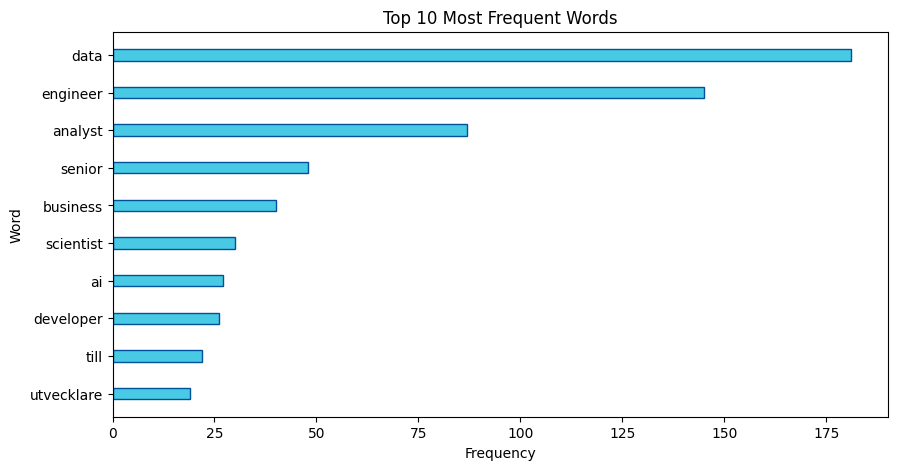

In [4]:
# Plot the top 10 most frequent words as a horizontal bar plot
top_words = df.sort_values(by="frequency", ascending=False).head(10)
plt.figure(figsize=(10, 5)) 
plt.barh(top_words["word"], top_words["frequency"], height=0.3, color="#48cae4", edgecolor="#00509d")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.title("Top 10 Most Frequent Words")
plt.gca().invert_yaxis()  # Optional: invert y-axis to have the highest frequency on top
plt.show()

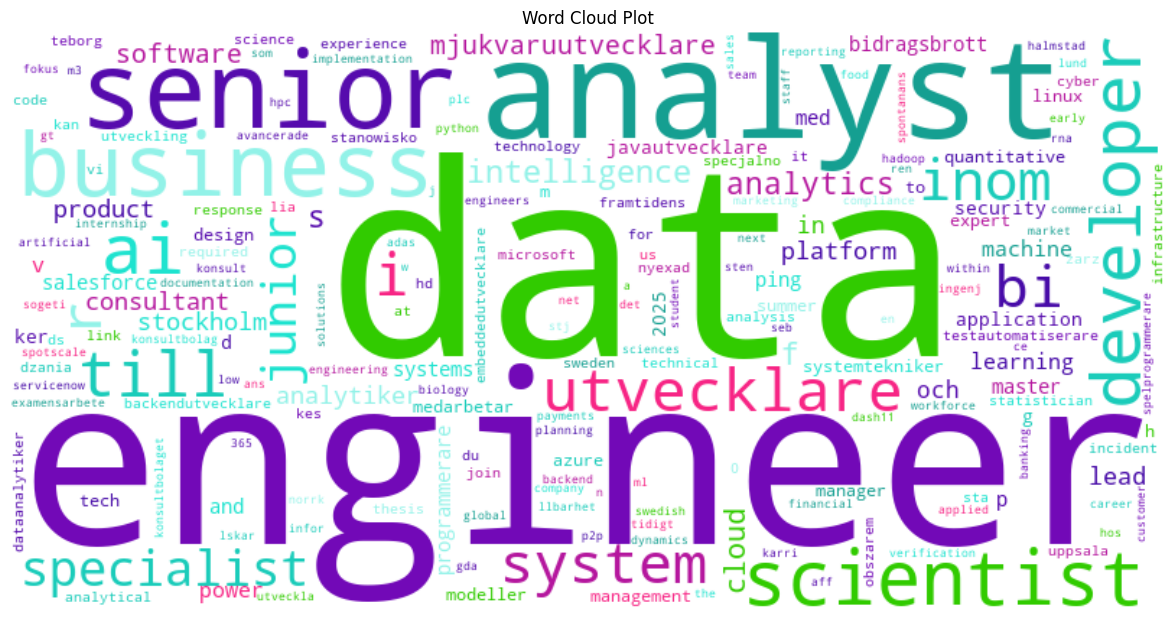

In [4]:
from wordcloud import WordCloud
# Define custom colors
#custom_colors = ["#669900", "#99cc33", "#ccee66", "#006699", "#3399cc", "#990066", "#cc3399", "#ff6600", "#ff9900", "#ffcc00"]
palette0 = ["#31cb00","#f72585", "#159f91", "#1bccba", "#1ee3cf", "#92f2e8","#b5179e", "#7209b7", "#560bad", "#480ca8"]

# Define a custom color function that deterministically assigns a color based on the word
def my_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    # Use the hash of the word to choose a color from the custom_colors list
    return palette0[hash(word) % len(palette0)]

# Assume df is your DataFrame with 'word' and 'frequency' columns
# Convert DataFrame to dictionary for word cloud generation
word_freq_dict = pd.Series(df.frequency.values, index=df.word).to_dict()

# Generate the word cloud using the custom color function
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    color_func=my_color_func
).generate_from_frequencies(word_freq_dict)

# Display the word cloud
plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud Plot")
plt.show()

In [4]:
data = pd.read_csv("linkedin_data.csv")
data.head()

,Title,Company,City,Posted Date,Applicant Count,Seniority Level,Employment Type,Job Function,Industries
0,Data Analyst,LTIMindtree,"Stockholm County, Sweden",2 weeks ago,98 applicants,Executive,Full-time,"Consulting, Information Technology, and Other","IT Services and IT Consulting, Information Ser..."
1,Business & Data Analyst,Karo Healthcare,"Stockholm, Stockholm County, Sweden",1 week ago,Over 200 applicants,Mid-Senior level,Full-time,Analyst,Non-profit Organizations and Primary and Secon...
2,Data Analyst,Avy,"Stockholm, Stockholm County, Sweden",1 month ago,Over 200 applicants,Entry level,Full-time,Information Technology,Real Estate
3,Data Analyst,RED Global,"Stockholm, Stockholm County, Sweden",1 week ago,99 applicants,Not Applicable,Contract,Information Technology,Staffing and Recruiting
4,Data Analyst,Capgemini,"Stockholm, Stockholm County, Sweden",6 days ago,Over 200 applicants,Entry level,Full-time,Information Technology,IT Services and IT Consulting


In [5]:
import pandas as pd

data = pd.read_csv("linkedin_data.csv")

def split_location(location):
    # Split on commas and remove extra whitespace
    parts = [part.strip() for part in location.split(',')]
    
    # If fewer than 3 parts, fill with None
    if len(parts) < 3:
        parts += [None] * (3 - len(parts))
    # If more than 3 parts, assume:
    # - The last element is Country,
    # - The second last is County,
    # - The rest joined together is City.
    elif len(parts) > 3:
        country = parts[-1]
        county = parts[-2]
        city = ', '.join(parts[:-2])
        parts = [city, county, country]
    return pd.Series(parts, index=['City', 'County', 'Country'])

# Apply the function to create new columns
data[['City', 'County', 'Country']] = data['City'].apply(split_location)

data.head(10)

,Title,Company,City,Posted Date,Applicant Count,Seniority Level,Employment Type,Job Function,Industries,County,Country
0,Data Analyst,LTIMindtree,Stockholm County,2 weeks ago,98 applicants,Executive,Full-time,"Consulting, Information Technology, and Other","IT Services and IT Consulting, Information Ser...",Sweden,None
1,Business & Data Analyst,Karo Healthcare,Stockholm,1 week ago,Over 200 applicants,Mid-Senior level,Full-time,Analyst,Non-profit Organizations and Primary and Secon...,Stockholm County,Sweden
2,Data Analyst,Avy,Stockholm,1 month ago,Over 200 applicants,Entry level,Full-time,Information Technology,Real Estate,Stockholm County,Sweden
3,Data Analyst,RED Global,Stockholm,1 week ago,99 applicants,Not Applicable,Contract,Information Technology,Staffing and Recruiting,Stockholm County,Sweden
4,Data Analyst,Capgemini,Stockholm,6 days ago,Over 200 applicants,Entry level,Full-time,Information Technology,IT Services and IT Consulting,Stockholm County,Sweden
5,Data Analyst,Deploja,Solna,1 week ago,57 applicants,Entry level,Full-time,Information Technology,IT Services and IT Consulting,Stockholm County,Sweden
6,Data Analyst,Deploja,Malmo,5 days ago,68 applicants,Entry level,Full-time,Information Technology,IT Services and IT Consulting,Sk√•ne County,Sweden
7,Stanowisko ds. zarzƒÖdzania obszarem BI i HD-s...,ZUS,Sweden,4 days ago,Be among the first 25 applicants,Not Applicable,Full-time,Other,Insurance,None,None
8,Data Analyst,Stegra,Stockholm,2 days ago,141 applicants,Entry level,Full-time,Information Technology,Primary Metal Manufacturing,Stockholm County,Sweden
9,Senior Data Analyst,CloudArt Solutions,Gothenburg,1 week ago,51 applicants,Mid-Senior level,Full-time,"Engineering, Information Technology, and Analyst",IT Services and IT Consulting,V√§stra G√∂taland County,Sweden


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            448 non-null    object
 1   Company          448 non-null    object
 2   City             448 non-null    object
 3   Posted Date      448 non-null    object
 4   Applicant Count  383 non-null    object
 5   Seniority Level  448 non-null    object
 6   Employment Type  448 non-null    object
 7   Job Function     445 non-null    object
 8   Industries       446 non-null    object
 9   County           416 non-null    object
 10  Country          407 non-null    object
dtypes: object(11)
memory usage: 38.6+ KB


In [7]:
data['Country'].fillna("Sweden", inplace=True)

/var/folders/01/b5x3fw5s02v_bktqct0c1hkw0000gn/T/ipykernel_99647/3123248010.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Country'].fillna("Sweden", inplace=True)


In [8]:
data['Industries'] = data['Industries'].replace( 
    "IT Services & IT Consulting",
    "IT Services and IT Consulting"
)

In [9]:
data['Industries'] = data['Industries'].replace( 
    "Software Development, IT Services and IT Consulting, and Business Consulting and Services",
    "IT Services and IT Consulting"
)

In [10]:
data.head()

,Title,Company,City,Posted Date,Applicant Count,Seniority Level,Employment Type,Job Function,Industries,County,Country
0,Data Analyst,LTIMindtree,Stockholm County,2 weeks ago,98 applicants,Executive,Full-time,"Consulting, Information Technology, and Other","IT Services and IT Consulting, Information Ser...",Sweden,Sweden
1,Business & Data Analyst,Karo Healthcare,Stockholm,1 week ago,Over 200 applicants,Mid-Senior level,Full-time,Analyst,Non-profit Organizations and Primary and Secon...,Stockholm County,Sweden
2,Data Analyst,Avy,Stockholm,1 month ago,Over 200 applicants,Entry level,Full-time,Information Technology,Real Estate,Stockholm County,Sweden
3,Data Analyst,RED Global,Stockholm,1 week ago,99 applicants,Not Applicable,Contract,Information Technology,Staffing and Recruiting,Stockholm County,Sweden
4,Data Analyst,Capgemini,Stockholm,6 days ago,Over 200 applicants,Entry level,Full-time,Information Technology,IT Services and IT Consulting,Stockholm County,Sweden


In [11]:
data.isnull().sum()

Title               0
Company             0
City                0
Posted Date         0
Applicant Count    65
Seniority Level     0
Employment Type     0
Job Function        3
Industries          2
County             32
Country             0
dtype: int64

In [11]:
data['City'].unique()

array(['Stockholm County', 'Stockholm', 'Solna', 'Malmo', 'Sweden',
       'Gothenburg', 'Lund', 'Ludvika', 'S√∂dermalm', 'S√∂dert√§lje',
       'V√§rnamo', 'M√∂lndal', 'Kristinehamns kommun', 'Ume√•',
       'Borl√§nge', 'Greater Uppsala Metropolitan Area', 'Lule√•',
       'Karlstad', 'Sundbyberg', 'Lule√• kommun', 'Link√∂ping',
       'H√§gersten', 'Karlskrona', 'Greater Stockholm Metropolitan Area',
       'Halmstad', 'Sundsvall Municipality', '√ñstersund', 'Falun',
       '√ñrebro', 'Bodens kommun', 'Helsingborg',
       'Greater Link√∂ping Metropolitan Area', 'Danderyd', 'Uppsala',
       'Sk√§rholmen', 'Laholms kommun', 'Blekinge County',
       'Greater Helsingborg Metropolitan Area', 'J√∂nk√∂ping',
       'Finsp√•ng', '√ñrebro kommun', 'Norrk√∂ping', 'Staffanstorp',
       'Oxel√∂sunds kommun', 'V√§stra G√∂taland County', 'Lysekil',
       'Kalmar', 'V√§nersborg', 'V√§ster√•s', 'K√∂ping', 'Arboga',
       '√ñrnsk√∂ldsviks kommun', '√Ñlmhult', 'Eskilstuna', 'V√§xj√∂',
       'G

In [12]:
data['Company'].unique()

array(['LTIMindtree', 'Karo Healthcare', 'Avy', 'RED Global', 'Capgemini',
       'Deploja', 'ZUS', 'Stegra', 'CloudArt Solutions', 'Combine',
       'SeenThis', 'NielsenIQ', 'Hitachi Energy', 'AI Staffing Ninja',
       'Blockchain Staffing Ninja', 'Sony Music Sweden', 'Peroptyx',
       'Professional Galaxy AB', 'Cushman & Wakefield', 'Signific',
       'inventYOU IT Consulting', 'GlobalConnect', 'Trustly',
       'Nissan Motor Corporation', 'Whitehall Resources', 'Riverty',
       'Polestar', 'Atea Sverige', 'Adage',
       'Massive Entertainment - A Ubisoft Studio', 'Stormyran',
       'Epidemic Sound', 'iPlace', 'GeekSoft Consulting', 'Aqilea',
       'Humana AB', 'Explore Consulting SWE', 'Sopra Steria',
       'V√§rnamo kommun', 'King', 'Kambi', 'Svenska kraftn√§t',
       'Parallel Consulting', 'TechSeed', 'Apoteket AB', 'IPercept',
       'CSV Rating AB', 'AstraZeneca', 'BayInCo Tech', 'Celonis',
       'Kronofogden', 'ComeOn Group', 'The Nutriment Company', 'Elvenite',
      

In [62]:
data['Title'].unique()

array(['Data Analyst', 'Business & Data Analyst',
       'Stanowisko ds. zarzƒÖdzania obszarem BI i HD-specjalno≈õƒá in≈ºynierii system√≥w Hurtowni Danych',
       'Senior Data Analyst',
       'Algoritmutveckling / Reglerteknik / Modellbaserad Utveckling Lund',
       'Analytical Consultant', 'Business Intelligence Analyst',
       'Stanowisko ds. zarzƒÖdzania obszarem BI i HD-specjalno≈õƒá in≈ºynierii system√≥w Business Intelligence',
       'Data Modeler & Data Analyst Consultant', 'Marketing Data Analyst',
       'Data Analyst (0 Experience Required)',
       'Data Analyst (Data Visualization) - Senior',
       'Junior Office Consultant',
       'Business Analyst - Data, Analytics & AI Use Cases',
       'Reporting & BI - Product & Market, AS Performance',
       'Data Modeller', 'Senior Data Analyst (m/f/d)',
       'Product Compliance Data Analyst',
       'Stanowisko ds. zarzƒÖdzania obszarem BI i HD-specjalno≈õƒá analityki biznesowej',
       'Data Engineer / Production Analyst

In [12]:
data['City'] = data['City'].str.replace('Sweden', 'Malmo')

In [13]:
data['City'] = data['City'].str.replace('Malmo', 'Malmö')

In [14]:
data['City'] = data['City'].str.replace('Solna', 'Stockholm')

In [15]:
data['City'] = data['City'].str.replace('Stockholm County', 'Stockholm')

In [16]:
data['City'] = data['City'].str.replace('Link√∂ping', 'Linköping')

In [17]:
data['City'] = data['City'].str.replace('Greater Link√∂ping Metropolitan Area', 'Linköping')

In [18]:
data['Company'] = data['Company'].str.replace('F√∂rs√§kringskassan', 'Försäkringskassan')

In [19]:
data['City'] = data['City'].str.replace('Borl√§nge', 'Borlänge')

In [20]:
data['City'] = data['City'].str.replace('Ume√•', 'Umeå')

In [21]:
data['City'] = data['City'].str.replace('√ñrebro kommun', 'Örebro')

In [22]:
data['City'] = data['City'].str.replace('√ñrebro', 'Örebro')

In [23]:
data['Company'] = data['Company'].str.replace('√ñrebro University', 'Örebro University')

In [24]:
data['Title'] = data['Title'].str.replace('Join us in Borl√§nge!', 'Join us in Borlänge!')

In [25]:
data['Title'] = data['Title'].str.replace('Junior utvecklare aff√§rssystem med intresse f√∂r f√∂retagsekonomi', 'Junior utvecklare affärssystem med intresse för företagsekonomi')

In [26]:
palette1 = ["#006699","#fd0363", "#ffdd00", "#00BA38", "#619CFF", "#F564E3"]
palette2 = ["#03045e","#023e8a","#0077b6","#0096c7","#00b4d8","#48cae4"]
palette3 = ["#03045e","#023e8a","#0077b6","#0096c7","#00b4d8","#ff9e00","#ff9100", "#ff8500","#ff6d00","#ff5400"]
palette4 = ["#48cae4","#00b4d8","#0096c7","#0077b6","#023e8a","#03045e"]
palette5 = ["#073b4c", "#118ab2", "#06d6a0", "#ffd166", "#ef476f" ]

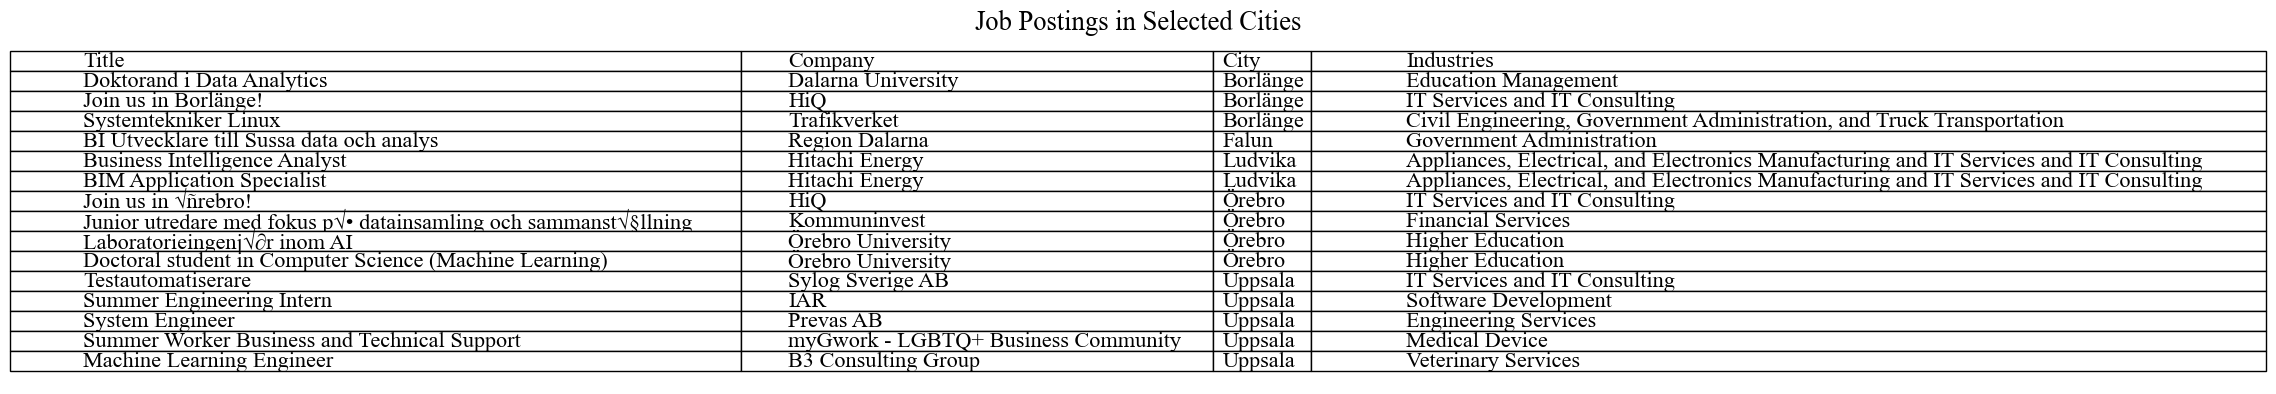

In [36]:
# Set global font to Times New Roman, size 12
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 16

# Filter for postings in Borlänge
borlange_jobs = data[data['City'] == 'Borlänge']
falun_jobs = data[data['City'] == 'Falun']
ludvika_jobs = data[data['City'] == 'Ludvika']
uppsala_jobs = data[data['City'] == 'Uppsala']
örebro_jobs = data[data['City'] == 'Örebro']
#umeå_jobs = data[data['City'] == 'Umeå']

# Combine the filtered DataFrames into one
selected_jobs = pd.concat([borlange_jobs, falun_jobs, ludvika_jobs, örebro_jobs, uppsala_jobs])

# Select the columns to display
table_data = selected_jobs[['Title', 'Company', 'City', 'Industries']]

import plotly.graph_objects as go

# Calculate a suitable height
# 40 pixels per row plus 100 pixels for header and margins (adjust as needed)
height = 40 * len(table_data) + 500

fig = go.Figure(data=[go.Table(
    header=dict(
        values=list(table_data.columns),
        fill_color='#669bbc',
        align='left',
        font=dict(family='Times New Roman', size=14, color="white"),
        line_color='black'
    ),
    cells=dict(
        values=[table_data[col] for col in table_data.columns],
        fill_color='#ffffff',
        align='left',
        font=dict(family='Times New Roman', size=14, color="black"),
        line_color='black'
    )
)])

fig.update_layout(height=height, margin=dict(l=20, r=20, t=40, b=20))
fig.write_image("static_table.png")


In [92]:
!pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 MB 7.7 MB/s eta 0:00:0000:0100:01m


In [40]:
import plotly.graph_objects as go

# Calculate a suitable height
# 40 pixels per row plus 100 pixels for header and margins (adjust as needed)
height = 40 * len(table_data) + 500

fig = go.Figure(data=[go.Table(
    header=dict(
        values=list(table_data.columns),
        fill_color='#669bbc',
        align='left',
        font=dict(family='Times New Roman', size=14, color="white"),
        line_color='black'
    ),
    cells=dict(
        values=[table_data[col] for col in table_data.columns],
        fill_color='#ffffff',
        align='left',
        font=dict(family='Times New Roman', size=14, color="black"),
        line_color='black'
    )
)])

fig.update_layout(height=height, margin=dict(l=20, r=20, t=40, b=20))
fig.write_image("static_table.png")


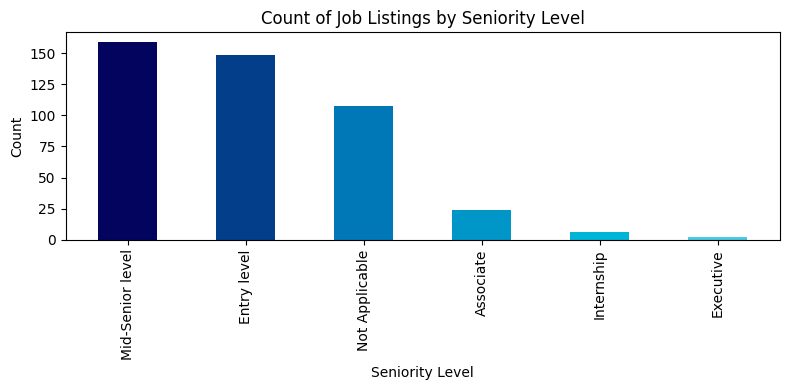

In [20]:
# 3. Countplot for Seniority Level
counts = data['Seniority Level'].value_counts()
plt.figure(figsize=(8, 4))
plt.bar(counts.index, counts.values, width=0.5, color=palette2)
plt.title("Count of Job Listings by Seniority Level")
plt.xlabel("Seniority Level")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

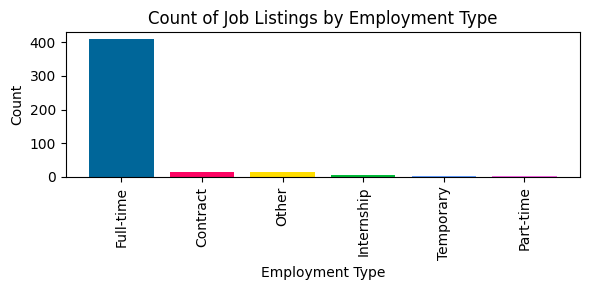

In [21]:
# 2. Countplot for Employment Type
counts = data['Employment Type'].value_counts()
plt.figure(figsize=(6, 3))
plt.bar(counts.index, counts.values, width=0.8, color=palette1)
plt.title("Count of Job Listings by Employment Type")
plt.xlabel("Employment Type")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

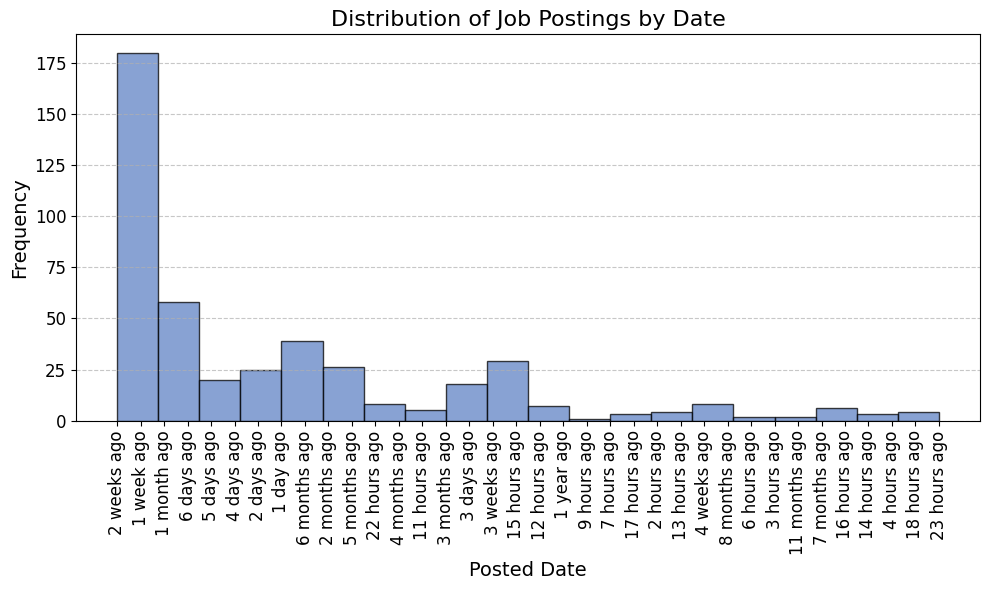

In [22]:
# 1. Histogram of Job Postings Over Time
plt.style.use('seaborn-v0_8-bright')

plt.figure(figsize=(10, 6))
plt.hist(data['Posted Date'].dropna(), bins=20, 
         color='#6083c5', edgecolor='black', alpha=0.75)
plt.title("Distribution of Job Postings by Date", fontsize=16)
plt.xlabel("Posted Date", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [23]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


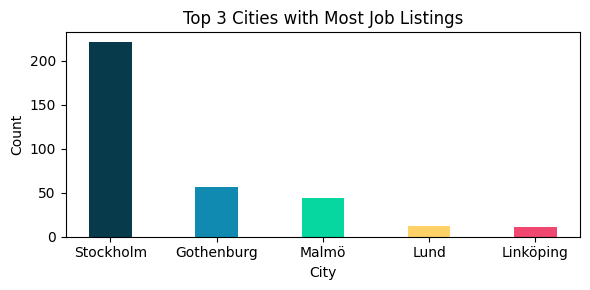

In [61]:
# 2. Top 5 Cities with Most Job Listings
top_cities = data['City'].value_counts().nlargest(5)
plt.figure(figsize=(6,3))
plt.bar(top_cities.index, top_cities.values, width=0.4, color=palette5)
plt.title("Top 5 Cities with Most Job Listings")
plt.xlabel("City")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

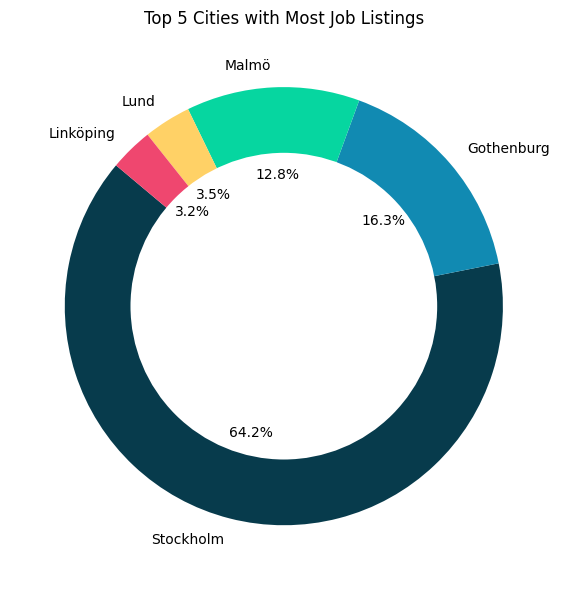

In [63]:
# 2. Top 5 Cities with Most Job Listings
plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(
    top_cities.values, 
    labels=top_cities.index, 
    autopct='%1.1f%%', 
    colors=palette5, 
    startangle=140)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Top 5 Cities with Most Job Listings")
plt.tight_layout()
plt.show()

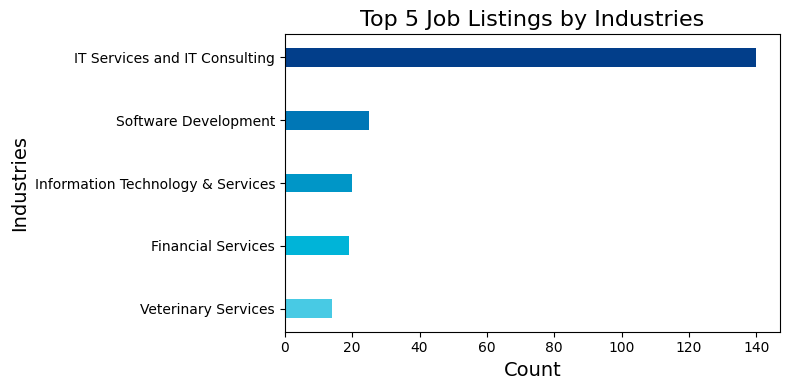

In [28]:
# 6. Countplot for Job listings by Industries
top_5_counts = data['Industries'].value_counts().nlargest(5)
# Reverse the order to have the highest count on top
top_5_counts = top_5_counts[::-1]
plt.figure(figsize=(8, 4))
plt.barh(top_5_counts.index, top_5_counts.values, height=0.3, color=palette4)
plt.title("Top 5 Job Listings by Industries", fontsize=16)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Industries", fontsize=14)
plt.tight_layout()
plt.show()

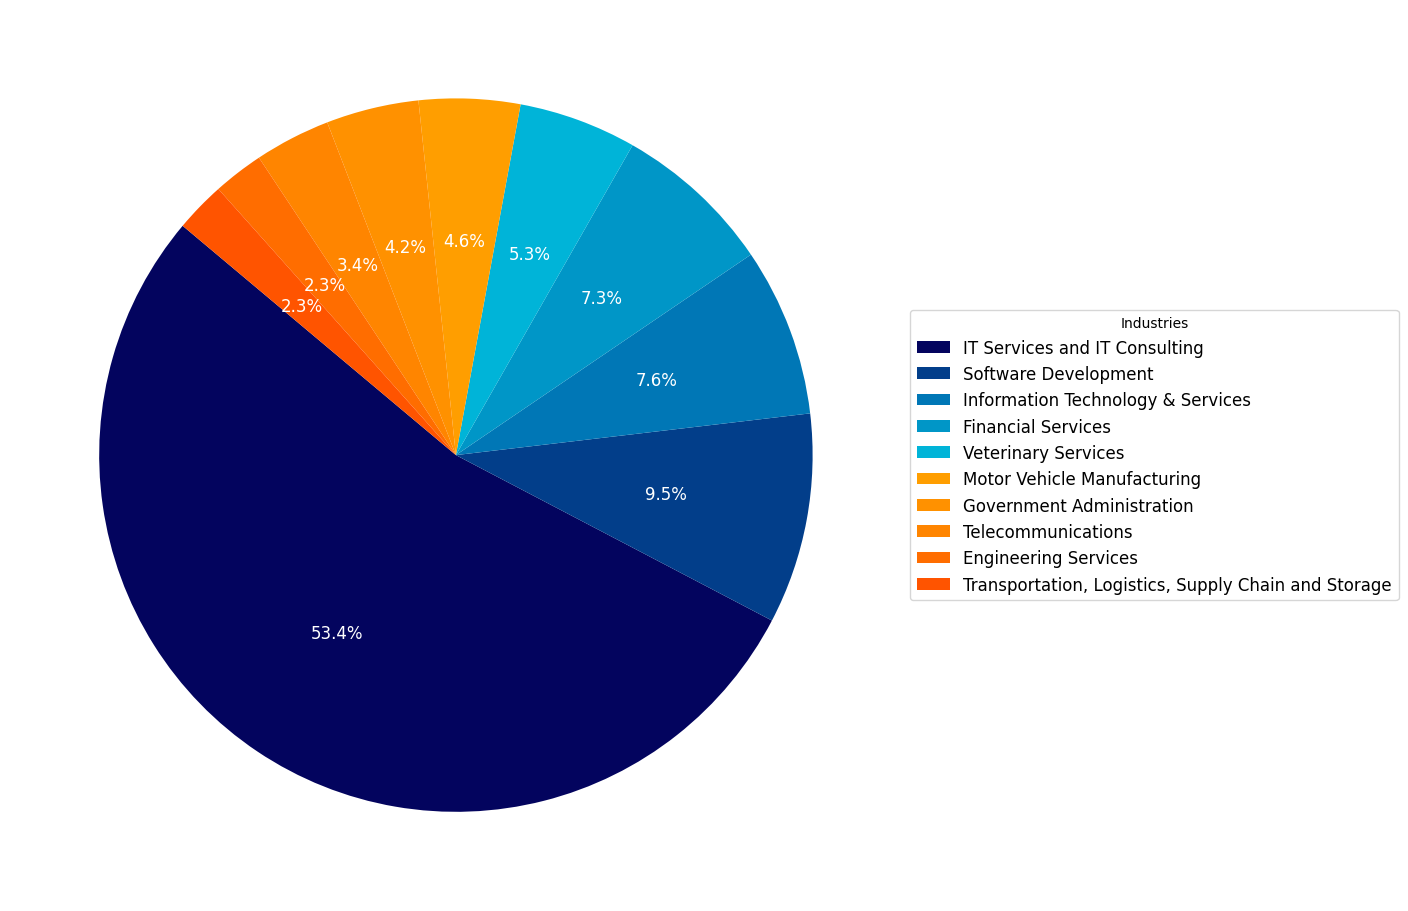

In [44]:
#Top 10 industries hiring for data-related jobs
palette3 = [ 
    "#03045e", "#0077b6", "#00b4d8", "#90e0ef", "#fff200", 
    "#ffe600", "#ffd900", "#ff4800", "#ff5400", "#ff6000"
]
# Calculate the top 10 industries
top_10_counts = data['Industries'].value_counts().nlargest(10)

# Prepare labels and sizes for the pie chart
labels = top_10_counts.index
sizes = top_10_counts.values

# Create the pie chart
plt.figure(figsize=(13, 10))
# Create the pie chart without specifying labels
wedges, _, autotexts = plt.pie(
    sizes, autopct='%1.1f%%', 
    startangle=140, 
    colors=palette3,
    textprops={'fontsize': 12})

# Change the percentage text color to white
for autotext in autotexts:
    autotext.set_color('white')

# Add a legend with the square color blocks (patches) and labels on the side
plt.legend(wedges, 
           labels, 
           title="Industries",
           fontsize=12, 
           loc="center left", 
           bbox_to_anchor=(1, 0, 0.5, 1))
#plt.title("Top 10 Job Listings by Industries", fontsize=16)
plt.tight_layout()
plt.show()

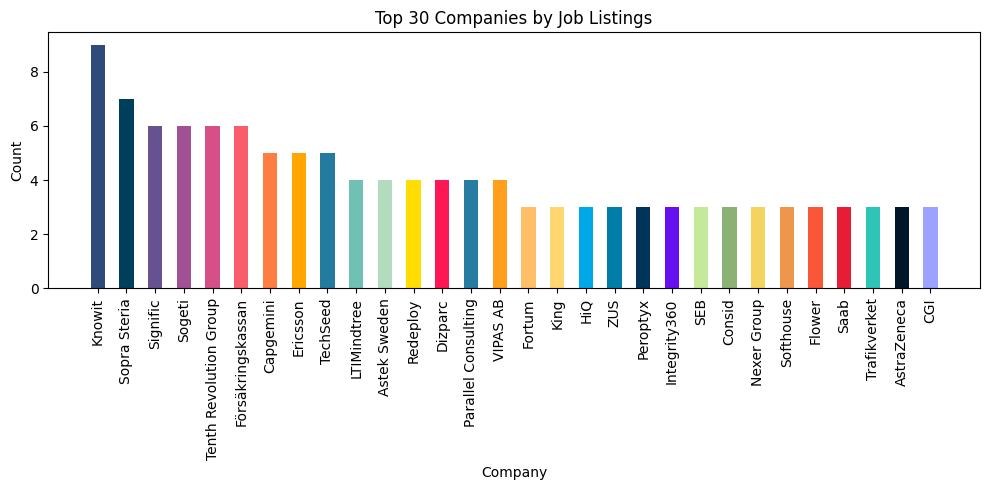

In [95]:
# Top 30 companies by number of listings
palette6 = [
    "#2f4b7c", "#003f5c", "#665191", "#a05195", "#d45087",
    "#f95d6a", "#ff7c43", "#ffa600", "#247ba0", "#70c1b3",
    "#b2dbbf", "#FFDD00", "#ff1654", "#277da1", "#ff9f1c",
    "#ffbf69", "#ffd670", "#00a8e8", "#007ea7", "#003459",
    "#6610f2", "#c5e99b", "#8bb174", "#f4d35e", "#ee964b",
    "#f95738", "#e71d36", "#2ec4b6", "#011627", "#9ba2ff"
]
top_companies = data['Company'].value_counts().nlargest(30)
plt.figure(figsize=(10, 5))
plt.bar(top_companies.index, top_companies.values,width=0.5, color=palette6)
plt.title("Top 30 Companies by Job Listings")
plt.xlabel("Company")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

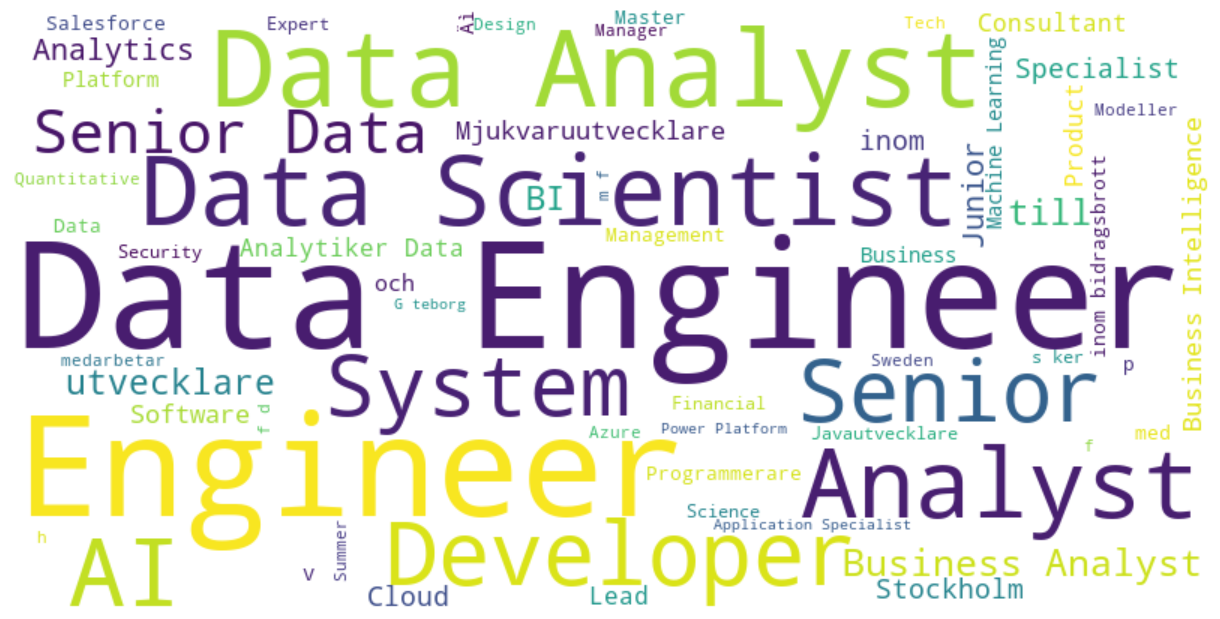

In [85]:
#7. Final Word cloud plot
# Combine job titles or any text source into one string
job_titles = ' '.join(data['Title'].dropna())

# Create a word cloud with custom aesthetic parameters
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',   # A clean, neutral background
    colormap='viridis',         # A visually appealing colormap
    max_font_size=100,
    min_font_size=10,
    contour_width=2,            # Adds a nice border around the cloud
    contour_color='steelblue',  # Color of the contour border
    margin=2                    # Adjust margin for spacing
).generate(job_titles)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes for a cleaner look
plt.tight_layout(pad=0)
plt.show()